# presentation du dataset:
Ce jeu de données semble être extrait d'un classement du bonheur mondial. Chaque ligne représente un pays avec des informations telles que le rang de bonheur, le score de bonheur, le PIB par habitant, la santé (espérance de vie), la liberté, la confiance dans le gouvernement, la générosité, etc. Ces données sont souvent utilisées dans le domaine de la recherche en sciences sociales pour étudier les facteurs qui contribuent au bien-être des individus à l'échelle mondiale. En français, on pourrait les appeler "Les données du Bonheur Mondial".

# objectif de projet:
C'est la prediction de 'Happiness Score' a partir de :  'Family', 'Health (Life Expectancy)', 'Freedom', 'Trus'(Government Corruption)','Generosity', 'Dystopia Residual'
en utilison la regression lineaire multiple.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv("2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
correlation_matrix = df[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                         'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                         'Dystopia Residual']].corr()
correlation_matrix

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [5]:
from sklearn.model_selection import train_test_split
y=df['Happiness Score']
x=df[['Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
'Generosity', 'Dystopia Residual']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
x_train.shape, x_test.shape

((118, 6), (40, 6))

In [6]:
# Ajout de la constante pour la régression
x_train = sm.add_constant(x_train)

# Création du modèle ajusté sur l'ensemble d'entraînement
lm = sm.OLS(y_train, x_train).fit()

# Affichage du résumé du modèle
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     561.5
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.38e-80
Time:                        13:16:37   Log-Likelihood:                 21.172
No. Observations:                 118   AIC:                            -28.34
Df Residuals:                     111   BIC:                            -8.949
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# interpretation:
Un coefficient de détermination (R-squared) de 0.968 indique que 96.8% de la variance dans les valeurs observées de 'Happiness Score' peut être expliquée par les variables indépendantes  'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', et 'Dystopia Residual') incluses dans votre modèle de régression linéaire multiple.

# representaion graphic:

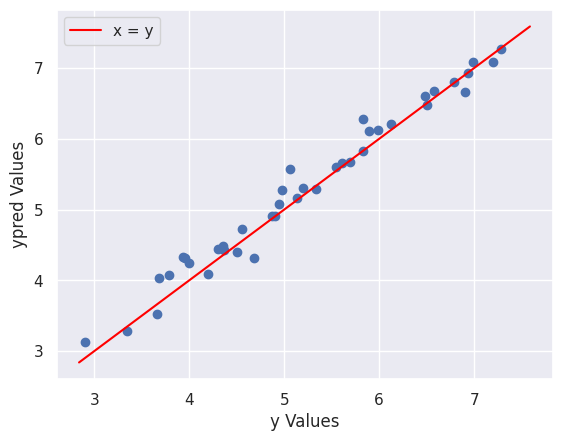

In [7]:
x_test = sm.add_constant(x_test)
y_pred = lm.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('y Values')
plt.ylabel('ypred Values')
# Trace d'une ligne diagonale pour representer y = x a titre de reference
plt.plot(y, y, color='red', label='x = y')
plt.legend()
plt.show()

# Regression with neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

2024-05-20 13:16:06.226106: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 13:16:06.281661: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 13:16:06.503227: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 13:16:07.614263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)



# Convert to numpy arrays (if not already)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f'Mean Absolute Error on test data: {mae}')

# Make predictions
y_pred = model.predict(x_test)

Epoch 1/100


/home/zaid/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 33.2961 - mae: 5.6459 - val_loss: 27.2622 - val_mae: 5.0973
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28.0638 - mae: 5.1893 - val_loss: 24.1809 - val_mae: 4.7944
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.7907 - mae: 4.8742 - val_loss: 21.2793 - val_mae: 4.4902
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.4090 - mae: 4.6274 - val_loss: 18.6246 - val_mae: 4.1915
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.5746 - mae: 4.3059 - val_loss: 16.1078 - val_mae: 3.8869
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.6273 - mae: 3.9700 - val_loss: 13.7451 - val_mae: 3.5764
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.9774 - mae: 3.6281 - val_loss: 11.5204 - val_mae: 3.2569
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.3910 - mae: 3.2660 - val_loss: 9.4298 - val_mae: 2.9248
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.2246 - ma

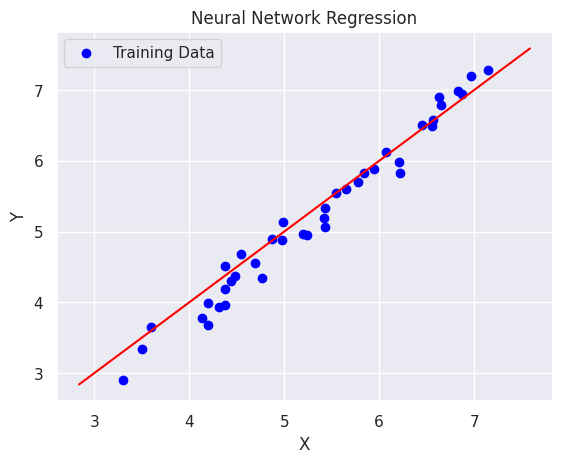

In [24]:
import matplotlib.pyplot as plt

# Plot the actual data and model predictions
plt.scatter(y_pred, y_test, label='Training Data', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.plot(y, y, color='red', label='x = y')
plt.title('Neural Network Regression')
plt.show()

In [26]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f'R-squared on test data: {r_squared}')

R-squared on test data: 0.9624342975715591


# interpretation

Proportion de Variance Expliquée : Un R-carré de 0.9624 signifie que 96.24% de la variance du score de bonheur est expliquée par les variables independant ('Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
'Generosity', 'Dystopia Residual') 
Précision du Modèle : Cette valeur est tres eleve ce qui indique que votre modèle de réseau de neurones est très précis pour prédire le score de bonheur à partir des variables données.

# comparaison des deux methodes:
Les réseaux de neurones peuvent modéliser des relations non linéaires complexes. Ils nécessitent souvent un temps de calcul plus long et une optimisation plus délicate,tandis que La régression OLS est une méthode linéaire plus simple et plus facile à interpréter. Elle est plus rapide à exécuter et les coefficients peuvent être interprétés directement en termes de relations linéaires entre les variables indépendantes et dépendantes.